In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [272]:
df= pd.read_csv("height-weight.csv")

In [273]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

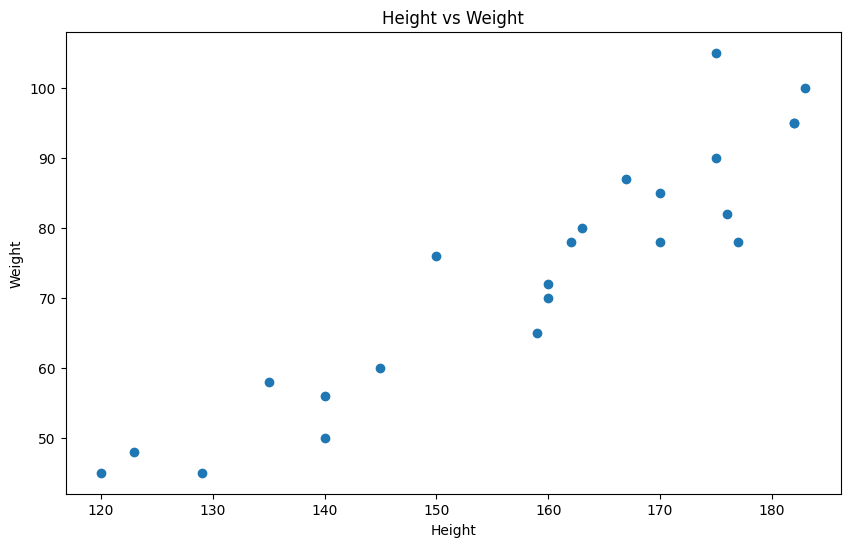

In [274]:
# scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df.Height,df.Weight)
plt.xlabel('Height')    
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [275]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


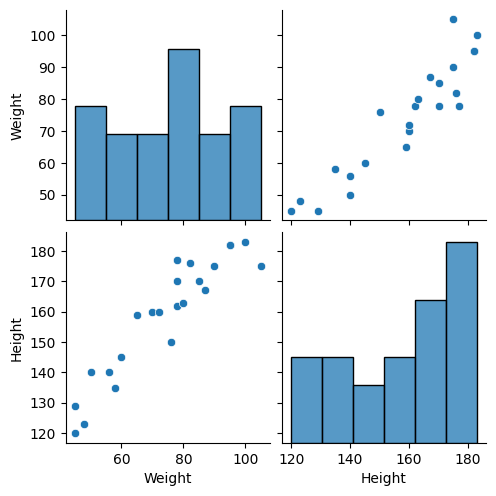

In [276]:
# use seaborn to plot pairplot
import seaborn as sns
sns.pairplot(df)

In [277]:
# Never use series on Independent variable
#X = df['Height']
#print(X)
#type(X)

In [278]:
#independent and dependent variables/feature
X = df[['Weight']]      # Independent variable should be dataframe or 2-D array
y = df['Height']        # Dependent variable should be series or 1-D array
print(type(X), type(y)) 

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [279]:
pip install scikit-learn

In [280]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [281]:
#standarization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()           #do standardization in input features because GD applied in it.
scaler.fit_transform(X_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [282]:
X_test = scaler.transform(X_test)

- fit_transform() : train dataa first we learn the data/vocabulary then convert into numerical or in mean=0 and variance=1
- transform() : But in test data transform based on training

In [283]:
# apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1) # n_jobs=-1 means use all the cores of CPU
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [284]:
print(f"Coefficient : {regression.coef_}")
print(f"Intercept : {regression.intercept_}")

Coefficient : [0.9630459]
Intercept : 85.96709053063559


- coefficient : One unit movement in the weight value that Leads to 0.9630459 unit movement in height value
- intercept : when weigt is zero the height meet at 85.96709053063559

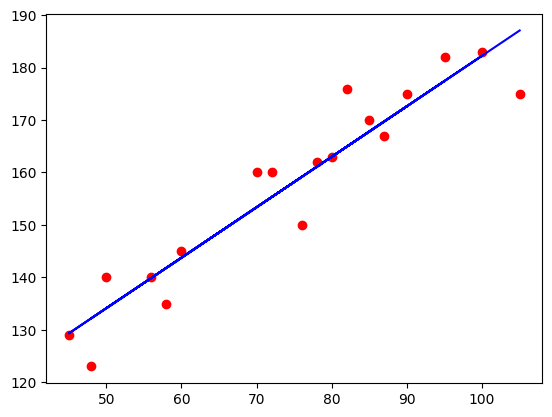

In [285]:
# plot training and plot bestfit line
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regression.predict(X_train), color='blue')

In [296]:
# predict the test set result
y_pred = regression.predict(X_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [297]:
y_pred.shape

(5,)

Prediction of test dataset
1. predicted height output = intercept + coefficient * weight
2. y_pred : 48.46 + 0.1109(X_test)

In [298]:
# performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error : {mse}")
print(f"Mean Absolute Error : {mae}")
print(f"Root Mean Squared Error : {rmse}")

Mean Squared Error : 6192.3331592623745
Mean Absolute Error : 75.74603640116501
Root Mean Squared Error : 78.69137919278309


In [289]:
# R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2}")

R2 Score : -11.579906466890895


# Adjusted R-squared value
- adj_r2 = 1 - [(1-r2)*(n-1)/(n-k-1)]
where,
    - r2: the r2 of the model
    - n: the number of observations
    - k: the number of predictor variables

In [290]:
# display adjusted R-squared value
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)

-15.773208622521192

## OLS Linear Regression

In [291]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [292]:
import statsmodels.api as sm 

In [293]:
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 0.43314448  0.43314448 -3.40697226  2.41138644 -1.07962878]


In [294]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              973.5
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                    1.90e-16
Time:                        11:25:49   Log-Likelihood:                         -80.143
No. Observations:                  18   AIC:                                      162.3
Df Residuals:                      17   BIC:                                      163.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [295]:
# prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.84307438])